<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week5_Day2_ExerciceXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1 : Understanding the problem and Data Collection

In [3]:
import pandas as pd

In [5]:
df=pd.read_csv("/content/diabetes_prediction_dataset.csv")
df.head()
# Nombre de cas positifs et négatifs
#print(df['diabetes'].value_counts())
# There are 91500 negatives cases and 8500 positives cases

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
from sklearn.model_selection import train_test_split

# Supposons que 'diabetes' soit la colonne cible
X = df.drop('diabetes', axis=1)  # Variables explicatives
y = df['diabetes']               # Variable cible

# Séparation 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifions les dimensions
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (80000, 8) Test: (20000, 8)


Exercise 2 : Model Picking and Standardization

In this problem, we can use Binary Classification because we are distinguishing between yes or no. We have only have 2 outputs.

In [7]:
# Encodage des variables catégorielles
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# S'assurer que les deux ont les mêmes colonnes
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)
X_train_scaled


array([[ 1.37871976e+00, -2.86309234e-01, -2.03558690e-01, ...,
         3.10684138e+00, -7.35110211e-01, -2.62931169e-01],
       [ 1.68986587e+00, -2.86309234e-01, -2.03558690e-01, ...,
        -3.21870310e-01,  1.36034024e+00, -2.62931169e-01],
       [-1.77010751e-01, -2.86309234e-01, -2.03558690e-01, ...,
        -3.21870310e-01, -7.35110211e-01, -2.62931169e-01],
       ...,
       [ 7.87021842e-04, -2.86309234e-01, -2.03558690e-01, ...,
        -3.21870310e-01,  1.36034024e+00, -2.62931169e-01],
       [-2.21460194e-01, -2.86309234e-01, -2.03558690e-01, ...,
        -3.21870310e-01,  1.36034024e+00, -2.62931169e-01],
       [-8.43752400e-01, -2.86309234e-01, -2.03558690e-01, ...,
        -3.21870310e-01,  1.36034024e+00, -2.62931169e-01]])

 Exercise 3 : Model Training

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Créer le modèle
model = LogisticRegression()

# 2. Entraîner le modèle
model.fit(X_train_scaled, y_train)

# 3. Prédire sur les données test
y_pred = model.predict(X_test_scaled)

# 4. Évaluer les performances
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 0.959
Precision: 0.8639344262295082
Recall   : 0.617096018735363
F1 Score : 0.7199453551912568


Exercise 4 : Evaluation Metrics

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


Plot the accuracy score

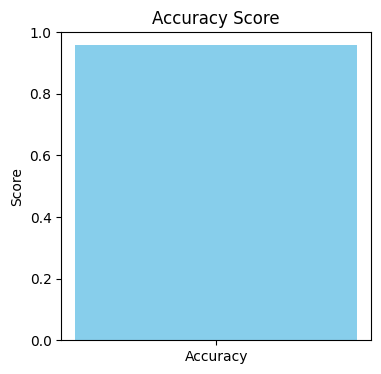

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Accuracy Score')
plt.ylabel('Score')
plt.show()


Plot the confusion matrix

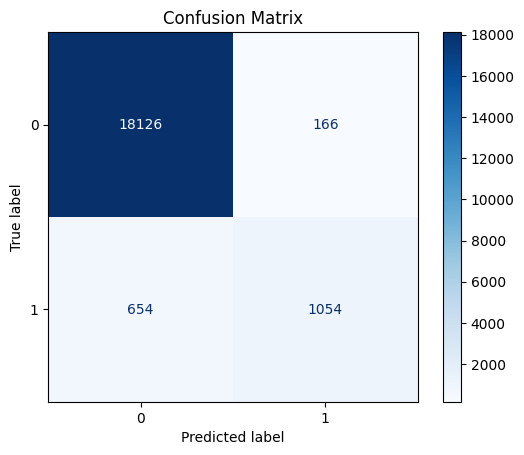

In [12]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Plot the Recall, precision, F1-score

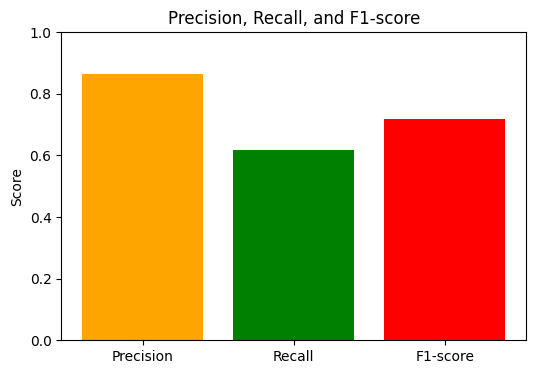

In [13]:
metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1-score']

plt.figure(figsize=(6, 4))
plt.bar(labels, metrics, color=['orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1-score')
plt.ylabel('Score')
plt.show()


Exercise 5 : Visualizing the performance of our model

In [15]:
from sklearn.decomposition import PCA

# Réduire les données standardisées à 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [16]:
model_2d = LogisticRegression()
model_2d.fit(X_train_pca, y_train)


LogisticRegression()

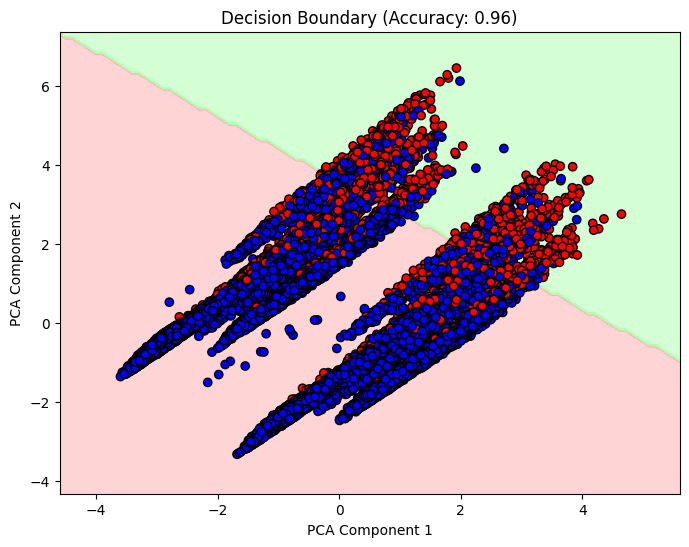

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Création d'une grille
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prédictions sur la grille
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot de la frontière
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)

# Points d’entraînement
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap='bwr')
plt.title(f"Decision Boundary (Accuracy: {accuracy:.2f})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Exercise 6 : ROC Curve

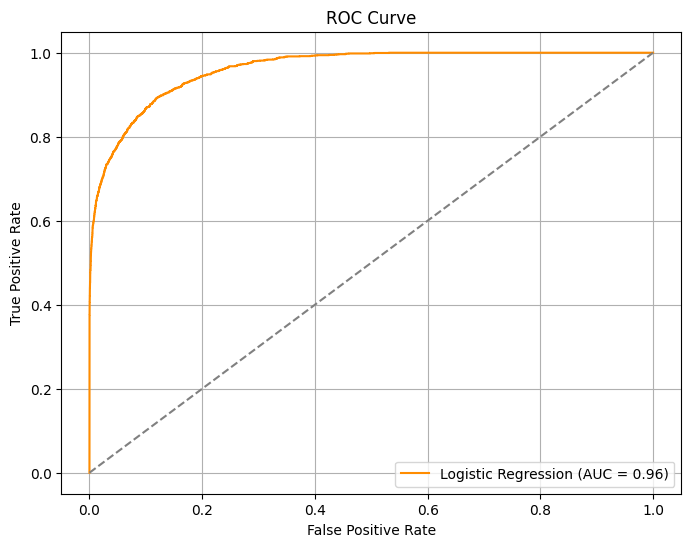

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Obtenir les probabilités pour la classe positive (diabète = 1)
y_scores = model.predict_proba(X_test_scaled)[:, 1]
# Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # ligne aléatoire
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
